# 1. Describing a single set of data
- VP of Fundraising asks you for some sort of description of how many friends your members have that he can include in his elevator pitches.
- easy to produce this data but how to describe it?
- an obvious desciption of an dataset is its data itself.

In [4]:
#Example

num_friends = [100,49,41,40,25,
               # ...lots of data
              ]

- for small dataset: easily readable
- for large dataset: cannot possible, therefore use statistics.
- Statistics is used to destill and communicate relevant features of our data
- for example: as first approach, we will put the friend counts in a histogram 

[17, 72, 97, 8, 32, 15, 63, 97, 57, 60, 83, 48, 100, 26, 12, 62, 3, 49, 55, 77, 97, 98, 0, 89, 57, 34, 92, 29, 75, 13, 40, 3, 2, 3, 83, 69, 1, 48, 87, 27, 54, 92, 3, 67, 28, 97, 56, 63, 70, 29, 44, 29, 86, 28, 97, 58, 37, 2, 53, 71, 82, 12, 23, 80, 92, 37, 15, 95, 42, 92, 91, 64, 54, 64, 85, 24, 38, 36, 75, 63, 64, 50, 75, 4, 61, 31, 95, 51, 53, 85, 22, 46, 70, 89, 99, 86, 94, 47, 11, 56, 84, 65, 13, 99, 20, 66, 50, 47, 62, 93, 3, 60, 5, 39, 90, 78, 75, 74, 50, 82, 21, 21, 64, 29, 1, 98, 25, 69, 70, 29, 51, 65, 44, 73, 45, 58, 34, 84, 70, 77, 93, 0, 49, 100, 94, 65, 16, 66, 99, 71, 26, 54, 7, 61, 46, 72, 70, 25, 64, 52, 62, 45, 53, 44, 0, 68, 69, 79, 100, 78, 42, 58, 76, 3, 29, 81, 22, 70, 74, 23, 11, 70, 32, 4, 86, 9, 10, 2, 57, 1, 96, 96, 35, 31, 34, 14, 79, 23, 44, 37, 8, 21, 20, 32]
Counter({70: 7, 3: 6, 29: 6, 97: 5, 64: 5, 92: 4, 75: 4, 44: 4, 32: 3, 63: 3, 57: 3, 100: 3, 62: 3, 0: 3, 34: 3, 2: 3, 69: 3, 1: 3, 54: 3, 86: 3, 58: 3, 37: 3, 53: 3, 23: 3, 50: 3, 99: 3, 65: 3, 21: 3, 

<BarContainer object of 101 artists>

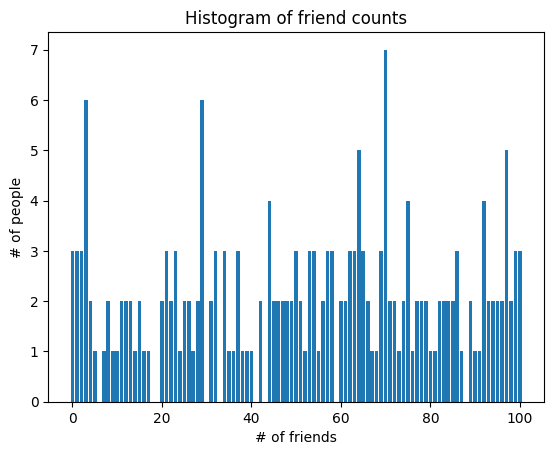

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import random

random.seed(1)
num_friends = [random.choice(range(101)) for _ in range(204)]  #Randomly generating a data of number of friends (can be max 100) of 204 people 
print(num_friends)
friend_counts = Counter(num_friends)
print(friend_counts)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.title("Histogram of friend counts")
plt.bar(xs,ys)

- again, to understand it deeply we need to generate some statistics, e.g.

In [7]:
#number of data points

num_data = len(num_friends)
print(num_data)

204


In [8]:
#largest and smallest values
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(largest_value, smallest_value)

100 0


In [9]:
#to know values specific to positions

sorted_num_friends = sorted(num_friends)
print(sorted_num_friends)
smallest_value = sorted_num_friends[0]
assert smallest_value == 0
largest_value = sorted_num_friends[-1]
assert largest_value == 100


[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 7, 8, 8, 9, 10, 11, 11, 12, 12, 13, 13, 14, 15, 15, 16, 17, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 25, 25, 26, 26, 27, 28, 28, 29, 29, 29, 29, 29, 29, 31, 31, 32, 32, 32, 34, 34, 34, 35, 36, 37, 37, 37, 38, 39, 40, 42, 42, 44, 44, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 50, 51, 51, 52, 53, 53, 53, 54, 54, 54, 55, 56, 56, 57, 57, 57, 58, 58, 58, 60, 60, 61, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 64, 65, 65, 65, 66, 66, 67, 68, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 71, 71, 72, 72, 73, 74, 74, 75, 75, 75, 75, 76, 77, 77, 78, 78, 79, 79, 80, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 86, 87, 89, 89, 90, 91, 92, 92, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 97, 97, 97, 98, 98, 99, 99, 99, 100, 100, 100]


# 2. Central tendencies

- Usually, we will want some notion of where our data is centered
### mean/average
   - sum of data divided by its count
   - It is a measure that represents the central point of a data set.
   - affected by outliers (extremely high or low values in the dataset) and can be skewed by them
   - best used: when the data is evenly distributed without outliers

In [10]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)


### Median

- middle value of a dataset when sorted to smallest to larger
- for even number dataset, median = avg of two middle values
- for odd number dataset, median = middle value
- **Calculation**: Order all values, then select the middle one (or average the two middle ones for an even number of values).
- **Resistant to Outliers**: The median is not affected by outliers or extremely skewed data.
- **Best Used**: When the data has outliers or is not symmetrically distributed.

In [11]:
#example

from typing import List

#mean
def mean(my_dataset: List[float]) -> float:
    return sum(my_dataset) / len(my_dataset)

#median

#for odd length dataset
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(my_dataset: List[float]) -> float:
    #median is middle element
    return my_dataset[len(my_dataset)//2]

#for even length dataset
def _median_even(my_dataset: List[float]) -> float:
    #median is avg of two middle elements
    low_midpoint = len(my_dataset)//2
    high_midpoint = low_midpoint-1
    return (my_dataset[low_midpoint] + my_dataset[high_midpoint])/2

#Overall median function
def median(my_dataset: List[float]) -> float:
    v = sorted(my_dataset)
    return _median_even(v) if len(v)%2 == 0 else _median_odd(v)

x = mean([1, 2, 3, 100, 4, 5])
y = median([1, 2, 3, 100, 4, 5])
print(f" mean = {x} and median = {y}")

    

 mean = 19.166666666666668 and median = 3.5


In [12]:
#lets add a outlier 5000 and check mean and median
#effect of outliers on mean is very high, whereas in median its very small

x = mean([1, 2, 3, 100, 4, 5, 5000,6000])
y = median([1, 2, 3, 100, 4, 5, 5000,6000])
print(f"mean = {x} and median = {y}")

mean = 1389.375 and median = 4.5


#### Median as Quantile
- Quantiles are a generalization of the median, representing the values below which a certain percentage of the data falls.
  
- The median is a specific quantile where 50% of the data lies below and 50% lies above.
  
- Median (50th Percentile): The value below which 50% of the data falls.
  
- First Quartile (Q1 or 25th Percentile): The value below which 25% of the data falls.
  
- Second Quartile (Q2 or 50th Percentile, which is the Median): The value below which 50% of the data falls.
  
- Third Quartile (Q3 or 75th Percentile): The value below which 75% of the data falls.

- Percentiles: Generalizes the concept further. For example, the 90th percentile represents the value below which 90% of the data falls.


In [13]:
#define quantile function

from typing import List

def quantile(my_dataset: List[float], my_quantile: float) -> float:
    my_sorted = sorted(my_dataset)
    return my_sorted[int(len(my_dataset)*my_quantile)]

quantile([1,2,3,4,5,6,7,8,9,10],0.25)

#means 25% values of dataset lies below 2 (not including 2)

3

#### using Numpy

In [14]:
import numpy as np

print(np.median([1,2,3,4]))
print(np.quantile([1,2,3,4,5,6,7,8,9,10],0.25))

2.5
3.25


### Mode
- most common values in a dataset
- used less frequently

[73]

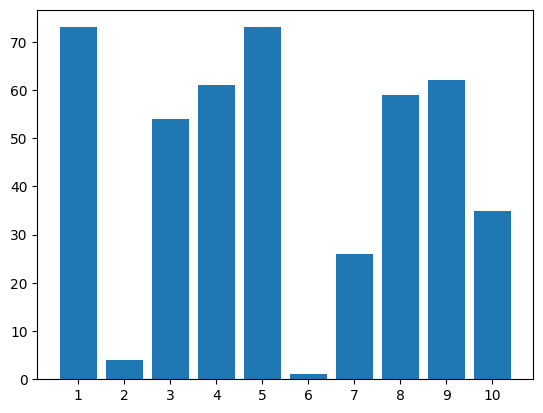

In [15]:
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

def mode(my_dataset: List[float]) -> List[float]:
    count_dict = Counter(my_dataset) #create a x:y dict for 'x value is repeting y times'
    max_counts = max(count_dict.values()) #max repeating times
    return [x for x,y in count_dict.items() if y == max_counts] #max repteating key or x

#check it
#generating a random dataset
import random
random.seed(10)
my_dataset = [random.choice(range(100)) for _ in range(10)] 
x_axis = [i+1 for i in range(10)]
plt.xticks(range(11))
plt.bar(x_axis, my_dataset)
mode(my_dataset) #73 is repeating max times (2 times), therefore mode is 73


# 3. Dispersion
- how spread our values in dataset are
- shows variability and volatility of data
- some common measures of dispersion:

[73, 4, 54, 61, 73, 1, 26, 59, 62, 35]


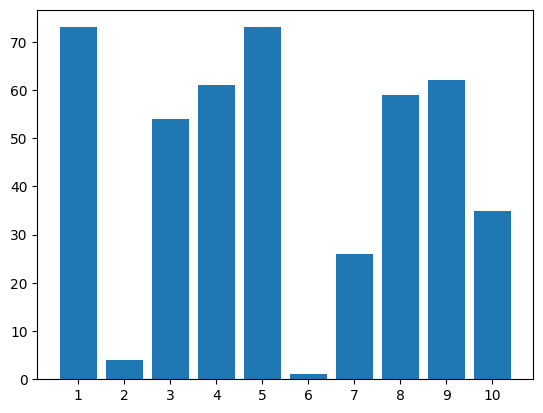

In [16]:
#example data
import matplotlib.pyplot as plt
import random
random.seed(10)
random_dataset = [random.choice(range(100)) for _ in range(10)] 
x_axis = [i+1 for i in range(10)]
plt.xticks(range(11))
plt.bar(x_axis, random_dataset)
print(my_dataset)

#### Range: **x(max) - x(min)**
   - The difference between the highest and lowest values in the dataset
   - It gives a quick sense of the spread
   - but can be heavily influenced by outliers
   - so max undispered data means? max=min -> list has only same values

In [17]:
def data_range(my_dataset: List[float]) -> float:
    return max(my_dataset) - min(my_dataset)

assert data_range(random_dataset) == 72 

#### Variance: **avg(sq(x-mean))**
   - average of the squared differences from the mean.
   - Variance provides a measure of how much each value in the data set varies from the mean.


In [18]:
from scratch.linear_algebra import sum_of_squares

#find x-mean, i.e. deviation from mean
def de_mean(my_dataset: List[float]) -> List[float]: 
    my_mean = mean(my_dataset)
    return [(x_i-my_mean) for x_i in my_dataset]
assert de_mean([1,2,3,4,5]) == [-2.0, -1.0, 0.0, 1.0, 2.0]

#find variance = sum of squares of mean deviations/length of dataset

def variance(my_dataset: List[float]) -> float:
    assert len(my_dataset) >=2 #variance requires at least two elements
    l = len(my_dataset)
    return sum_of_squares(de_mean(my_dataset))/l-1

#This looks like it is almost the average squared deviation from the mean, except that
#we’re dividing by n - 1 instead of n. In fact, when we’re dealing with a sample from a
#larger population, x_bar is only an estimate of the actual mean, which means that on
#average (x_i - x_bar) ** 2 is an underestimate of x_i’s squared deviation from the
#mean, which is why we divide by n - 1 instead of n. See Wikipedia.


print(variance([1,2,3,4,5]))

1.0


#### Standard Deviation: **sqrt(var)**
   - square root of the variance
   - It is in the same units as the data, making it more interpretable than variance
   - **A low standard deviation means -> the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range**

In [21]:
import math
from typing import List
from scratch.statistics import mean
from scratch.statistics import variance

def standard_deviation(my_dataset: List[float]) -> float:
    #SD is square root of variance
    return math.sqrt(variance(my_dataset))

print(standard_deviation([1,2,3,4,5]))
print(standard_deviation([1,2,3,4,5,100]))  #outlier problem

1.0
36.1589853594127


#### Interquartile Range (IQR): **Q3 - Q1**
   - both range and SD are very vulnerable to outliers
   - so we use values between 25% and 75% i.e. 1st and 3rd quantile to get less affected by outliers
   - it is the range within which the central 50% of the values fall
   - calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1)


In [22]:
from scratch.statistics import variance, mean, quantile
def interquatile_range(my_dataset: List[float]) -> float:
    #value of q3- values of q1 = interquantile range
    return quantile(my_dataset,0.75)-quantile(my_dataset,0.25)

print(interquatile_range([1,2,3,4,5]))
print(interquatile_range([1,2,3,4,5,100]))  #not much affected by small number of outliers

2
3


# 4. Covariance and Correlation

## Covariance
 Covariance = `[x-x_mean](dot)[y-y_mean])/(n-1)`

- its sign indicates the direction of the linear relationship:
  
    - Positive covariance indicates a positive relationship.

    - Negative covariance indicates a negative relationship.
    
    - Covariance close to zero indicates a weak or no linear relationship.

In [24]:
from scratch.linear_algebra import dot_product
from typing import List

def covariance(x: List[float], y: List[float]) -> float:
    assert len(x) == len(y), "different sizes!"
    return dot_product(de_mean(x),de_mean(y))/(len(x)-1)

assert  1.6 < covariance([1,2,3,4], [5,6,7,8]) < 1.7
    

Limitations of covariance?
- its units are product of imputs units
- if x becomes 2*x, then covariance will also be doubled, which indicate nothing. means its just says they are positive correlated but how to quantify their correlation?
- for this we use Correlation

## Correlation
![](correlation_formula.png)

- unitless
- always between -1 to 1
- -1 means perfect anticorrelation, 1 means perfect correlation
- 0.25 means relatively weak positive correlation

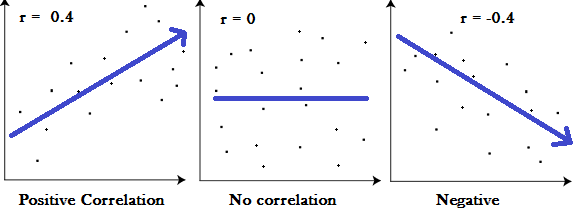

In [25]:
from typing import List
def correlation(x: List[float], y:List[float]):
    return covariance(x,y)/(standard_deviation(x)*standard_deviation(y))

- sometimes if we remove outlier, the correlation becomes very strong.

- for example:

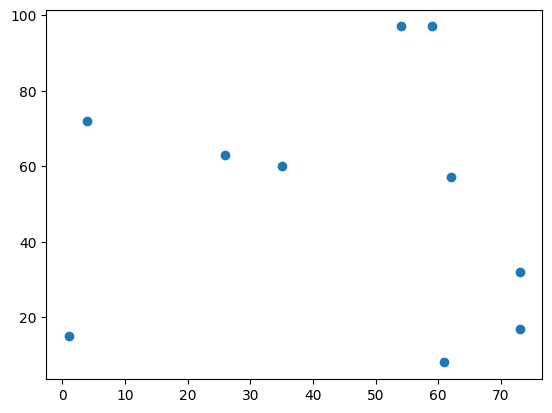

In [44]:
#example data 
#no outlier
import matplotlib.pyplot as plt
import random
random.seed(10)
my_x = [random.choice(range(100)) for _ in range(10)]
random.seed(1) 
my_y = [random.choice(range(100)) for _ in range(10)]
plt.scatter(my_x,my_y)
plt.show()


-0.49268962021771157


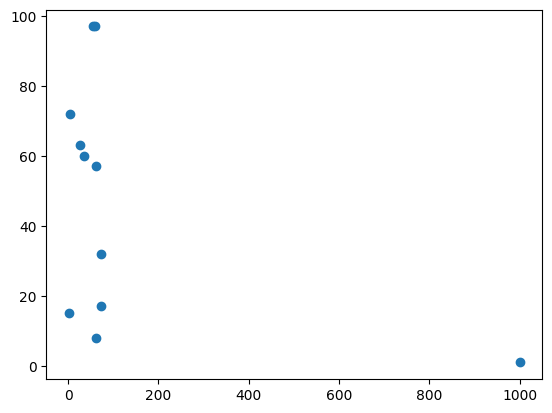

In [48]:
#with outlier

import matplotlib.pyplot as plt
import random
random.seed(10)
my_x = [random.choice(range(100)) for _ in range(10)]
my_x.append(1000) #adding an outlier in sample data
random.seed(1) 
my_y = [random.choice(range(100)) for _ in range(10)]
my_y.append(1) #adding an outlier in sample data
plt.scatter(my_x,my_y)
print(correlation(my_x,my_y))  #shows near to 0 correlation, means the data has no relation.

- the outlier was actually an internal test account that no one ever bothered to remove. So you feel justified in excluding it.

## Correlation caveats (problems)

### 1. Simponson's Paradox
- the composition of subgroups can significantly affect the interpretation of aggregated data, leading to seemingly paradoxical results.
  
- problem with correlation is that: in a data correlation measures relation between two variables considering all other factors equal

- If your dataclasses are assigned at random, as they might be in a well-designed experiment, “all else being equal” might not be a terrible assumption. But when there is a deeper pattern to class assignments, “all else being equal” can be an awful assumption.

- The only real way to avoid this is by knowing your data and by doing what you can to make sure you’ve checked for possible **confounding factors**. (Obviously, this is not always possible)

### 2. Correlation shows 0, but there can be any other relationship between two variables
- for example: `x = [-2,-1,0,1,2] and y = [2,1,0,1,2]`

- here, x and y have zero correlation. But they certainly have a relationship— each element of y equals the absolute value of the corresponding element of x.

### 3. Correlation tells nothing about how large the relationship is

- Imagine we have two datasets:

Dataset 1:
X: [1, 2, 3, 4, 5]
Y: [2, 4, 6, 8, 10]

Dataset 2:
X: [1, 2, 3, 4, 5]
Y: [10, 20, 30, 40, 50]

- Both of these datasets will have a correlation of 1, indicating a perfect positive linear relationship. However, the scales of the relationships are very different. In the first dataset, for each unit increase in X, Y increases by 2 units. In the second dataset, for each unit increase in X, Y increases by 10 units.

- Even though both have a correlation of 1, the 'strength' or 'magnitude' of the relationship (i.e., how much Y changes with a unit change in X) is much larger in the second dataset. This illustrates that while correlation tells us about the direction and consistency of the relationship, it does not tell us about the magnitude of change.

- Therefore, when analyzing data, it's important to consider both the correlation and the actual values or scale of the data to fully understand the nature of the relationship between variables.

## Correlation and Causation
- "Correlation does not imply causation" is a fundamental principle in statistics and data analysis.
  
- This means that just because two variables are correlated (i.e., there is a statistical association between them), it does not necessarily mean that one variable causes the other.

- Correlation indicates a relationship, but it does not imply a cause-and-effect relationship.

- if and are strongly correlated, that might mean that causes , that causes , that each causes the other, that some third factor causes both, or nothing at all.

**Why Correlation Does Not Imply Causation:**
- Third Variable Problem: There may be a third variable (confounding variable) influencing both variables, creating a spurious correlation.

- Reverse Causation: The observed correlation might be due to the effect of the second variable on the first, rather than the other way around.

- Coincidence: Correlation may be coincidental, and there may be no causal relationship between the variables.

- To establish causation, additional evidence such as controlled experiments, randomized trials, or a solid theoretical framework is needed. While correlation is a valuable tool in identifying associations, it should not be used alone to infer causation.


**Example 1: Ice Cream Sales and Drowning Incidents**  
Correlation:
There might be a positive correlation between the number of ice cream sales and the number of drowning incidents during the summer months. As ice cream sales increase, drowning incidents may also increase.

Explanation:
This correlation does not imply causation. The common factor here is the season—summer. Both ice cream sales and drowning incidents may increase in summer because of higher temperatures. The correlation is coincidental and not causal.





# Important python libraries

## 1. scipy
- fundamental library in python built on **numpy**
- used for scientific and technical computing
- provides a large number of **higher-level functions that operate on numpy arrays**

1. **Integration (scipy.integrate)**: Provides functions for integrating functions and solving differential equations.

2. **Optimization (scipy.optimize)**: Offers algorithms for function minimization, root finding, and curve fitting.

3. **Interpolation (scipy.interpolate)**: Allows for smooth interpolation of data points with various methods.

4. **Fourier Transforms (scipy.fftpack)**: Contains functions for computing fast Fourier transforms.

5. **Signal Processing (scipy.signal)**: Includes tools for signal processing: filtering, windowing, signal generation, etc.

6. **Linear Algebra (scipy.linalg)**: Provides more advanced linear algebra routines beyond those in numpy.linalg.

7. **Sparse Matrices (scipy.sparse)**: Includes tools for working with sparse matrices.

8. **Statistics (scipy.stats)**: Contains a large number of probability distributions, statistical functions, and tests.

9. **Multidimensional Image Processing (scipy.ndimage)**: Offers various functions for multi-dimensional image processing.

10. **Special Functions (scipy.special)**: Gives access to numerous mathematical functions like Bessel, Gamma, Beta, hypergeometric, etc.

In [49]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 1.3 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 14.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Example: to find minimum value of a simple function

from scipy.optimize import minimize

# Define the objective function
def objective_function(x):
    return (x - 2)**2 + 5

# Initial guess for the minimum (starting point for the optimization)
initial_guess = 0

# Use the minimize function to find the minimum
result = minimize(objective_function, initial_guess)

# Extract the optimal value of x
optimal_x = result.x[0]

# Print the result
print("Optimal value of x:", optimal_x)
print("Minimum value of the function:", result.fun)



Optimal value of x: 2.00000001888464
Minimum value of the function: 5.0


## 2. pandas

- Pandas is a powerful and flexible data analysis/manipulation library available in Python. 

- Pandas is an essential tool in the Python data science toolkit, often used in conjunction with libraries like NumPy, Matplotlib, and SciPy.

    - DataFrame Object: A primary data structure of pandas, DataFrame, is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

    - Series Object: A one-dimensional labeled array capable of holding any data type.

    - Handling Different Data Types: Pandas can easily handle a variety of data types, including floating point, integer, boolean, categorical, datetime, and more.

    - Data Alignment and Missing Data Handling: It has in-built support for automatically aligning data from different sources and handling missing data.

    - File I/O: Ability to read and write data from different file formats like CSV, Excel, JSON, HTML, HDF5, etc.

    - Data Cleaning and Transformation: Offers extensive functions for cleaning, transforming, and reshaping data.

    - Merging and Joining: Provides SQL-like operations for merging or joining data sets.

    - Grouping and Aggregation: Powerful grouping and aggregation capabilities for data summarization.

    - Time Series Analysis: In-built support for handling and analyzing time-series data.

    - Visualization: Simple wrapping of Matplotlib for quick and easy data visualization.

In [3]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 8.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 9.9 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 8.5 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

#create a dataframe using pandas

data = {'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'San Francisco', 'Los Angeles']
}

df = pd.DataFrame(data)
print(df)

#similar to R dataframe

#perform basic operation
print(df['Age'].mean())

      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles
30.0


### Categorical data

- In the context of data analysis and statistics, "categorical" refers to a type of data that can take on one of a limited, and usually fixed, number of possible values. These values represent discrete categories or groups. Categorical data is often used to represent characteristics such as a person's gender, a car's color, or a student's grade level.

- There are two main types of categorical data:

    - Nominal Data: This is categorical data where the order of the categories is not significant. For example, the colors of cars (red, blue, green) are nominal because the order in which you list these colors does not carry any intrinsic meaning.

    - Ordinal Data: This type of categorical data involves some order; the categories have a logical sequence. For example, ratings such as "good", "better", "best" have an inherent order. The order is significant and meaningful.

- In data analysis, especially with libraries like Pandas in Python, it's often important to specify when data is categorical because it informs the analysis and visualization techniques you might use. For example, certain statistical models or plots are more appropriate for categorical data.

- In Pandas, you can specify that a column in a DataFrame is categorical by converting it to the category dtype.

  - This conversion can lead to more efficient storage and faster operations, especially for large datasets, as Pandas uses an optimized internal representation for categorical data.

In [16]:
import pandas as pd

df = pd.DataFrame({'grade': ['A', 'B', 'C', 'D', 'F']})
df['grade'] = df['grade'].astype('category')

## 3. StatsModels

- Linear Models: It offers various options for linear regression, including Ordinary Least Squares (OLS), Generalized Least Squares (GLS), and robust linear models.

- Generalized Linear Models: For data that do not fit the normal distribution, statsmodels includes Generalized Linear Models (GLM) such as logistic regression for binary outcomes.

- Time Series Analysis: It has tools for the estimation of time series models, including ARIMA (AutoRegressive Integrated Moving Average) and state-space models.

- Nonparametric Methods: Statsmodels provides nonparametric statistics methods, which can be useful when the data does not meet the assumptions required by parametric methods.

- Statistical Tests: The module includes a variety of statistical tests for different purposes, such as t-tests, chi-square tests, and ANOVA.

- Plotting Functions: It offers various plotting functions for visualizing results, like autocorrelation plots, partial autocorrelation plots, and qq-plots.

- Datasets: Statsmodels includes several datasets which can be used for examples and testing models.

- Extensive Output of Model Summaries: The summary output of models in statsmodels is comprehensive, showing various statistical metrics that help in interpreting the model's performance.


In [21]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 13.7 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.1 MB/s eta 0:00:00


In [26]:
import statsmodels.api as sm
import pandas as pd

# Example data
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 4, 5, 4, 5]
})

# Ordinary Least Squares (OLS) regression
model = sm.OLS(df['Y'], sm.add_constant(df['X'])).fit()

# View the summary of the model
print(model.summary())

#In this example, an OLS regression model is fitted to the data, 
#and then the summary of the model is printed, 
#which includes various statistical measures and tests to assess the model's validity and performance

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sun, 21 Jan 2024   Prob (F-statistic):              0.124
Time:                        10:02:39   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/Users/tanukhanuja/anaconda3/envs/dsfs/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
